In [38]:

import seaborn as sns
from matplotlib import pyplot
import pandas as pd
import sys
import os
from pathlib import Path
import csv


In [39]:
def plot_bar(filename, impl):
	sns.set_theme()
	csv_file = pd.read_csv(filename)
	plot = sns.barplot(data=csv_file,y="# Benchmark name", x="system-time-median", orient="horizontal")
	plot.set_title(f"{impl} -- 50000 kernels")
	pyplot.savefig(f"img/{filename[:-4]}.png", bbox_inches='tight')

In [40]:
# Function to split each row into three rows
def split_row(row):
	name = row['# Benchmark name']
	columns_to_split = ['system-time-median', 'kernel-time-median']
	rows_to_write = []

	for column in columns_to_split:
		new_row = {key: row[key] for key in row if key != column}
		new_row['median_type'] = column
		new_row['median_value'] = row[column]
		rows_to_write.append(new_row)

	return rows_to_write

def split_csv(input_file):
	# Define the input and output file names
	output_file = f'{input_file[:-4]}_splitted.csv'

	# Read the input CSV and write the output CSV
	with open(input_file, mode='r') as input_csv, open(output_file, mode='w', newline='') as output_csv:
		reader = csv.DictReader(input_csv)
		fieldnames = [
			'# Benchmark name',
			'Verification',
			'device-name',
			'kernel-time-mean',
			'kernel-time-median',
			'kernel-time-min',
			'kernel-time-samples',
			'kernel-time-stddev',
			'kernel-time-throughput',
			'local-size',
			'problem-size',
			'run-time-mean',
			'run-time-median',
			'run-time-min',
			'run-time-samples',
			'run-time-stddev',
			'run-time-throughput',
			'submit-time-mean',
			'submit-time-median',
			'submit-time-min',
			'submit-time-samples',
			'submit-time-stddev',
			'submit-time-throughput',
			'sycl-implementation',
			'system-time-mean',
			'system-time-median',
			'system-time-min',
			'system-time-samples',
			'system-time-stddev',
			'system-time-throughput',
			'throughput-metric',
			'median_type',
			'median_value'
		]

		writer = csv.DictWriter(output_csv, fieldnames=fieldnames)
		writer.writeheader()

		for row in reader:
			split_rows = split_row(row)
			writer.writerows(split_rows)
	return output_file

In [41]:
# stacked plots
def plot_stacked_bar(filename, impl):
	sns.set_theme()
	csv_file = pd.read_csv(split_csv(filename))
	df_pivot = pd.pivot_table(csv_file, index='# Benchmark name', columns='median_type', values='median_value', aggfunc='sum')
	ax = df_pivot.plot.barh(stacked=True)
	ax.set_title(f"{impl} -- 50000 kernels -- Total")
	ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
	ax.set_xlabel("Time (s)")
	pyplot.savefig(f"img/{filename[:-4]}_stacked.png", bbox_inches='tight')

## DPCPP

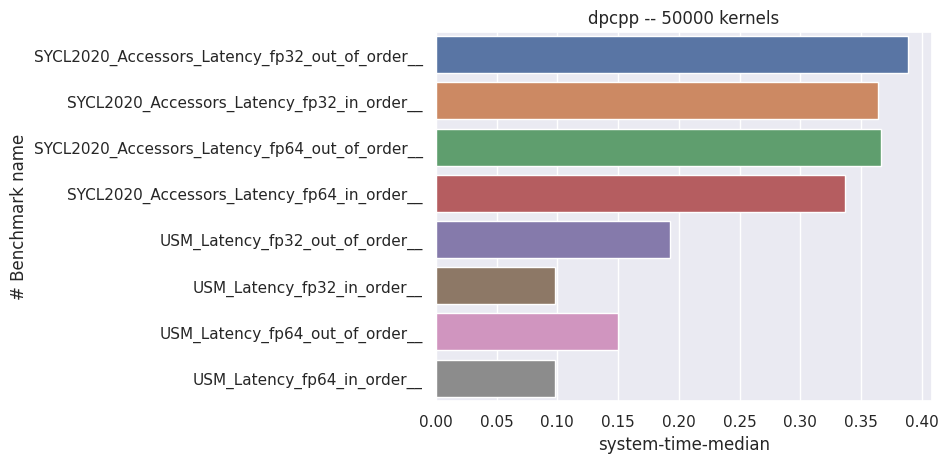

In [42]:
impl = "dpcpp"
filename = f"accessor_latency_{impl}.csv"
plot_bar(filename,"dpcpp")

In [43]:
# impl = "dpcpp"
# filename = f"accessor_latency_{impl}_1rep.csv"
# plot_bar(filename, "dpcpp")

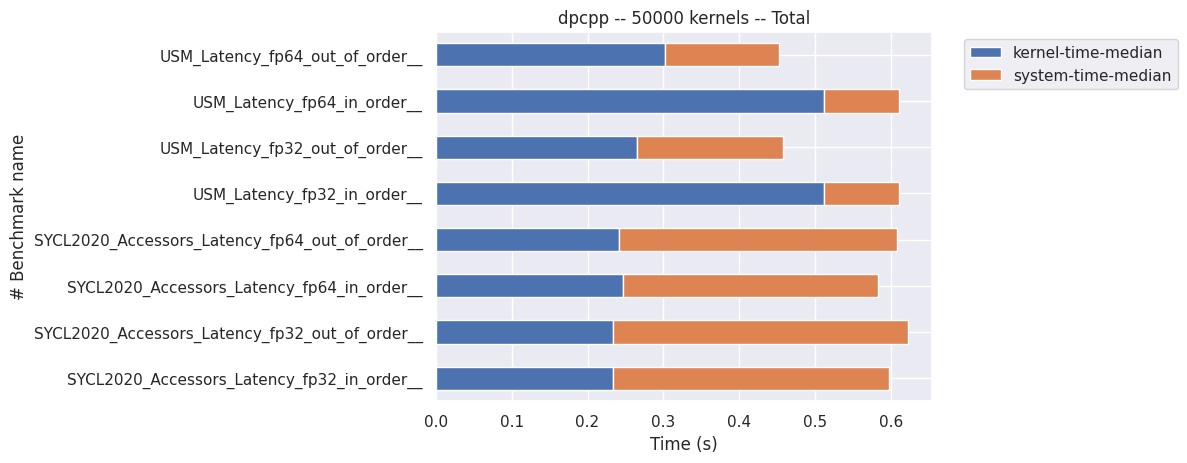

In [44]:
impl = "dpcpp"
filename = f"accessor_latency_{impl}.csv"
plot_stacked_bar(filename, impl)

## ADAPTIVE CPP

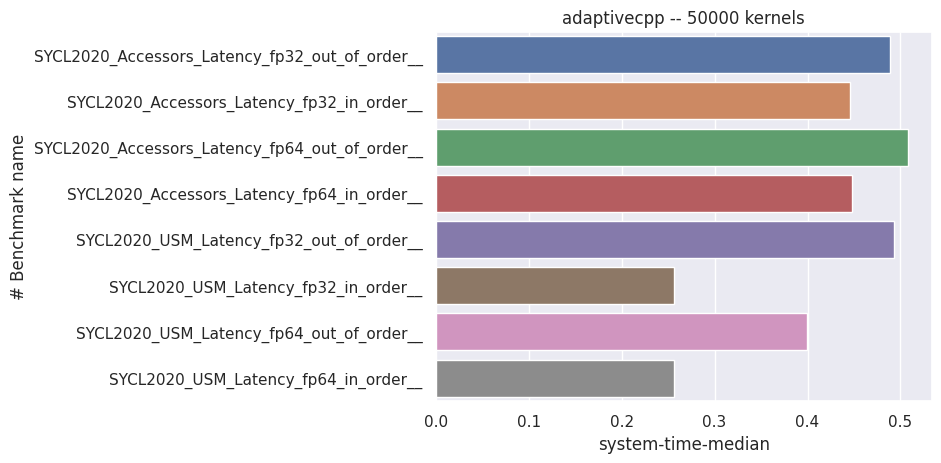

In [45]:
impl = "adaptivecpp"
filename = f"accessor_latency_{impl}.csv"
plot_bar(filename, impl)

In [46]:
# impl = "adaptivecpp"
# filename = f"accessor_latency_{impl}_1rep.csv"
# plot_bar(filename, impl)

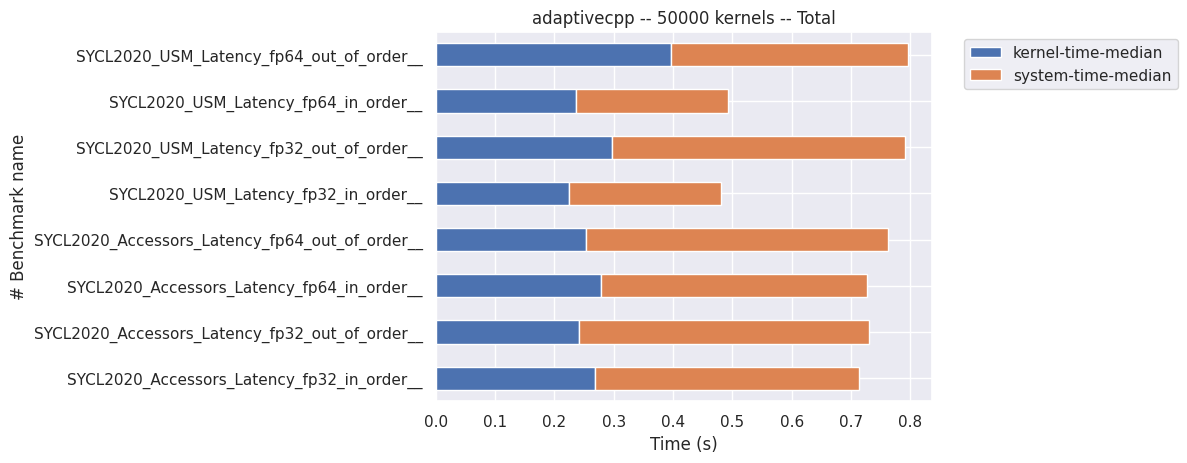

In [47]:
impl = "adaptivecpp"
filename = f"accessor_latency_{impl}.csv"
plot_stacked_bar(filename, impl)